# DTW and Zero Flow Analysis Code
Written by Danielle Tadych

 The purpose of this script is to determine if there is a statistical relationship between DTW and number of zero flow days for reaches

## Loading packages and files

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gp
import scipy.stats as sp
import sys

# Add the path to the Utils folder
utils_path = os.path.abspath(os.path.join('..', 'Utils'))
if utils_path not in sys.path:
    sys.path.append(utils_path)

import CustomFunctions as cf


# Data paths
datapath = '../../Data'
inputpath = '../../Data/Input'
outputpath = '../../Data/Output/Local'
shapepath = inputpath+'/Shapefiles'
figurepath = '../../Figures/Local/'

In [4]:
# Change the huc level
huc_num = "12"

In [5]:
# %%  ==== Reading in the data ====
# Define some things about your file

StudyArea = "HUC"+huc_num+"s"
Naming_col = "huc"+huc_num
distance = 2000

# Now to read in the streamflow data
filename_ts = f'/{Naming_col}_average_flow_onlyoutlets.csv'
annual_db = pd.read_csv(outputpath+filename_ts, header=1, index_col=0)

#Block to do some formatting
annual_db = annual_db[0:168102]
annual_db.index = annual_db.index.astype('int64')
zero_flow = annual_db.reset_index(inplace=True)
zero_flow = annual_db.rename(columns = {'Year':'index'})
zero_flow.set_index('index', inplace=True)
zero_flow.info()

# Read in the annual time series database
# filepath = outputpath + f'{StudyArea}bufferedflowlines{distance}_MedianDecadeDTW.csv'
filepath = outputpath + f'{StudyArea}bufferedflowlines{distance}_Median5YearDTW.csv'
dtw = pd.read_csv(filepath, index_col=0)
dtw = dtw.transpose()
dtw.index = dtw.index.astype('int64')
dtw.reset_index(inplace=True)
dtw = dtw.rename(columns = {'year':'index'})
dtw.set_index('index', inplace=True)
# print("Water Levels for "+StudyArea+" Analysis loaded.")
# dtw


FileNotFoundError: [Errno 2] No such file or directory: '../../Data/Output/Local/huc12_average_flow_onlyoutlets.csv'

In [77]:
zero_flow

,1980,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
index,,,,,,,,,,,,,,,,,,,,,
1501000105,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1501000204,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1501000209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1501001002,NaN,NaN,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1502000201,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,319.0,260.0,291.0,228.0,239.0,310.0,312.0,220.0,250.0,14.0
1502000802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44.0,56.0,96.0,87.0,0.0,0.0,0.0,0.0,0.0,NaN
1502000806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1502001001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,202.0,255.0,365.0,237.0,248.0,359.0,218.0,229.0,291.0,14.0
1502001402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
dtw

5_yr,1980,1985,1990,1995,2000,2005,2010,2015,2020
index,,,,,,,,,
1407000605,NaN,NaN,16.00,NaN,NaN,NaN,NaN,NaN,NaN
1407000609,NaN,NaN,8.00,NaN,NaN,NaN,NaN,NaN,NaN
1407000611,NaN,NaN,NaN,24.0,NaN,5.0,NaN,NaN,NaN
1407000707,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN
1501000103,NaN,NaN,0.00,24.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1508030104,51.7,48.5,49.50,50.0,52.50,51.0,65.0,59.8,64.45
1508030110,NaN,NaN,106.50,79.1,119.85,NaN,NaN,25.4,NaN
1508030201,29.7,29.9,29.00,29.3,30.40,30.2,30.7,30.5,30.70


In [79]:
# %% Creating colors
c_1 = '#8d5a99' # Reservation
c_2 = "#d7191c" # Regulated with CAP (Water Category Color)
c_3 = '#e77a47' # Regulated without CAP (Water Category Color)
c_4 = '#2cbe21' # Lower CO River - SW (Water Category Color)
c_5 = '#2f8c73' # Upper CO River - Mixed (Water Category Color)
c_6 = '#6db7e8' # SE - GW
c_7 = '#165782' # NW - GW (Water Category color)
c_8 = '#229ce8' # SC - GW
c_9 = '#1f78b4' # NE - GW
c_10 = '#41bf9e' # N - Mixed
c_11 = '#7adec4' # C - Mixed
drought_color = '#ffa6b8'
wet_color = '#b8d3f2'

reg_colors = [c_2,c_7]
georeg_colors = [c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,c_10,c_11]
SW_colors = [c_2,c_3,c_4,c_5,c_7]

bar_watercatc = [c_2,c_3,c_4,c_5,c_7]


# Color blind palette
# https://jacksonlab.agronomy.wisc.edu/2016/05/23/15-level-colorblind-friendly-palette/
cblind =["#000000","#004949","#009292","#ff6db6","#ffb6db",
 "#490092","#006ddb","#b66dff","#6db6ff","#b6dbff",
 "#920000","#924900","#db6d00","#24ff24","#ffff6d"]

# Matching new map

grace_color = '#A92B2A'
az_wells_color = '#1D4E77'

cap = '#77A8A5' #'#C6652B'
cap_secondary = '#004D40'
# noCAP = '#EDE461' # This is one from the map
noCAP = '#CCC339' # This color but darker for lines
GWdom = '#3B76AF'
mixed = '#6EB2E4'
swdom = '#469B76'

In [80]:
# Run this code if you read in the decadal or 5year dtw
df = zero_flow.transpose()
df.index = pd.DatetimeIndex(df.index)
df['decade'] = (df.index.year // 10) * 10  # Floors year to the nearest decade

# Group by decade and take the mean or median
zf_per_decade = df.groupby("decade").mean()  # Change to .mean() if needed
zf_per_decade

df = zero_flow.transpose()
df.index = pd.DatetimeIndex(df.index)
df['5_yr'] = (df.index.year // 5) * 5  # Floors year to the nearest 5th year

# Group by decade and take the mean or median
zf_per_5yr = df.groupby("5_yr").mean()  # Change to .mean() if needed
zf_per_5yr

index,1501000105,1501000204,1501000209,1501001002,1502000201,1502000802,1502000806,1502001001,1502001402,1503010403,...,1505020205,1505030109,1505030404,1506010301,1506010503,1506020201,1506020304,1507010206,1507010303,1507010305
5_yr,,,,,,,,,,,,,,,,,,,,,
1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
1985,0.0,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,32.833333,...,NaN,3.0,NaN,0.0,4.5,0.0,NaN,36.0,NaN,NaN
1990,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,184.5,21.600000,...,70.5,33.0,117.333333,0.0,3.2,0.0,NaN,61.0,1.0,1.8
1995,0.0,0.0,0.0,0.0,0.0,NaN,NaN,257.4,323.6,54.625000,...,54.0,0.0,103.250000,0.0,14.9,0.0,NaN,NaN,113.8,3.0
2000,0.0,NaN,0.0,0.0,48.2,10.5,0.0,300.0,323.0,NaN,...,44.2,3.6,168.200000,0.0,77.4,0.0,NaN,NaN,259.6,1.4
2005,NaN,NaN,0.0,0.0,276.4,27.0,0.0,269.2,239.0,NaN,...,28.4,9.8,323.200000,0.0,48.8,0.0,0.0,NaN,195.2,6.8
2010,NaN,NaN,0.0,0.0,309.4,50.4,0.0,269.4,NaN,NaN,...,67.8,35.0,334.800000,0.0,44.0,0.0,0.0,NaN,287.2,11.8
2015,NaN,NaN,0.0,0.0,282.2,57.4,0.0,259.2,NaN,NaN,...,158.8,90.0,339.400000,0.0,63.6,0.0,0.0,NaN,337.4,32.6
2020,NaN,NaN,0.0,0.0,266.2,0.0,0.0,269.0,NaN,NaN,...,258.2,0.4,346.600000,0.0,91.6,0.0,0.0,NaN,235.2,4.8


In [81]:
# zf = zf_per_decade.transpose()
zf = zf_per_5yr.transpose()

In [82]:
# Find common HUC12s in both datasets
common_hucs = dtw.index.intersection(zf.index)
common_hucs

Index([1501001002, 1502000201, 1502000802, 1502000806, 1502001001, 1503010403,
       1504000509, 1504000608, 1505010001, 1505010002, 1505010007, 1505020205,
       1505030109, 1505030404, 1506010503, 1506020201, 1506020304, 1507010206,
       1507010303, 1507010305],
      dtype='object', name='index')

In [83]:
# Subset both datasets to only include common HUC12s
dtw_df = dtw.loc[common_hucs]
zero_flow_df = zf.loc[common_hucs]


In [84]:
# Only run this if doing yearly
# zero_flow_df = zero_flow_df.iloc[:, :-1]  # Drops the last column


In [85]:
# Convert to numeric
dtw_df = dtw_df.apply(pd.to_numeric, errors="coerce")
zero_flow_df = zero_flow_df.apply(pd.to_numeric, errors="coerce")


In [86]:
dtw_df

5_yr,1980,1985,1990,1995,2000,2005,2010,2015,2020
index,,,,,,,,,
1501001002,54.2000,59.000,60.000,50.000,60.0000,20.000,11.00,NaN,NaN
1502000201,NaN,25.000,5.500,26.500,40.0000,61.500,NaN,22.5000,25.0000
1502000802,99.5000,NaN,143.100,11.000,12.0000,15.000,15.00,NaN,NaN
1502000806,30.5000,21.500,6.000,19.000,12.0000,15.000,28.50,NaN,58.0000
1502001001,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,3.0000
1503010403,NaN,11.000,0.000,75.000,75.0000,NaN,NaN,NaN,NaN
1504000509,35.0525,41.675,36.400,65.150,50.0200,35.370,48.45,53.0600,52.9750
1504000608,30.0000,32.800,NaN,54.000,37.0000,NaN,NaN,NaN,NaN
1505010001,27.5000,18.250,34.625,40.000,54.9550,52.000,57.75,61.4250,59.3000


Now this method gets rid of all nan's where they don't have points in common

In [87]:
df_dtw = dtw_df.copy()
df_nzf = zero_flow_df.copy()

# Ensure HUC12 is a column, not an index
df_dtw = df_dtw.reset_index()
df_nzf = df_nzf.reset_index() 

# Melt DTW DataFrame
df_dtw_melted = df_dtw.melt(id_vars=["index"], var_name="Year", value_name="DTW")
df_dtw_melted["Year"] = df_dtw_melted["Year"].astype(int)

# Melt NZF DataFrame
df_nzf_melted = df_nzf.melt(id_vars=["index"], var_name="Year", value_name="NZF")
df_nzf_melted["Year"] = df_nzf_melted["Year"].astype(int)

# Merge melted dataframes
df_final = df_dtw_melted.merge(df_nzf_melted, on=["index", "Year"])

# Print to check the result
df_final


,index,Year,DTW,NZF
0,1501001002,1980,54.200,NaN
1,1502000201,1980,NaN,NaN
2,1502000802,1980,99.500,NaN
3,1502000806,1980,30.500,NaN
4,1502001001,1980,NaN,NaN
...,...,...,...,...
175,1506020201,2020,67.100,0.0
176,1506020304,2020,NaN,0.0
177,1507010206,2020,29.350,NaN
178,1507010303,2020,61.000,235.2


In [88]:
df_final = df_final.dropna(subset=["DTW", "NZF"])
df_final

,index,Year,DTW,NZF
17,1507010206,1980,19.8500,0.000000
20,1501001002,1985,59.0000,1.000000
21,1502000201,1985,25.0000,0.000000
25,1503010403,1985,11.0000,32.833333
26,1504000509,1985,41.6750,17.166667
...,...,...,...,...
172,1505030109,2020,96.2775,0.400000
174,1506010503,2020,34.1750,91.600000
175,1506020201,2020,67.1000,0.000000
178,1507010303,2020,61.0000,235.200000


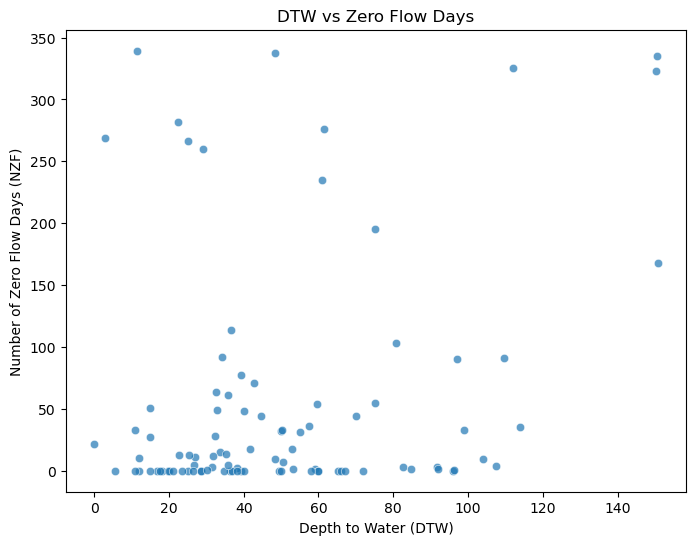

In [89]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_final, x="DTW", y="NZF", alpha=0.7)
plt.xlabel("Depth to Water (DTW)")
plt.ylabel("Number of Zero Flow Days (NZF)")
plt.title("DTW vs Zero Flow Days")
plt.show()

In [90]:
print('Pearson Correlation Coefficient')
df1 = df_final['DTW']
df2 = df_final['NZF']
r = df1.corr(df2, method='pearson')
print('  rsq = ' + str(round(r * r, 3)))
print('  pval = ' + str(round(df1.corr(df2, method=cf.pearsonr_pval), 4)))

Pearson Correlation Coefficient
  rsq = 0.065
  pval = 0.0124


In [91]:
print('Spearman Correlation Coefficient')
df1 = df_final['DTW']
df2 = df_final['NZF']
r = df1.corr(df2, method='spearman')
print('  rsq = ' + str(round(r * r, 3)))
print('  pval = ' + str(round(df1.corr(df2, method=cf.spearmanr_pval), 4)))

Spearman Correlation Coefficient
  rsq = 0.043
  pval = 0.0442


In [92]:
print('Kendall Correlation Coefficient')
df1 = df_final['DTW']
df2 = df_final['NZF']
r = df1.corr(df2, method='kendall')
print('  rsq = ' + str(round(r * r, 3)))
print('  pval = ' + str(round(df1.corr(df2, method=cf.kendall_pval), 4)))

Kendall Correlation Coefficient
  rsq = 0.023
  pval = 0.037


Now this does per huc

1501001002:
Pearson Correlation Coefficient
  rsq = 0.121
  pval = 0.4994
Spearman Correlation Coefficient
  rsq = 0.018
  pval = 0.8019
Kendall Correlation Coefficient
  rsq = 0.014
  pval = 0.7664


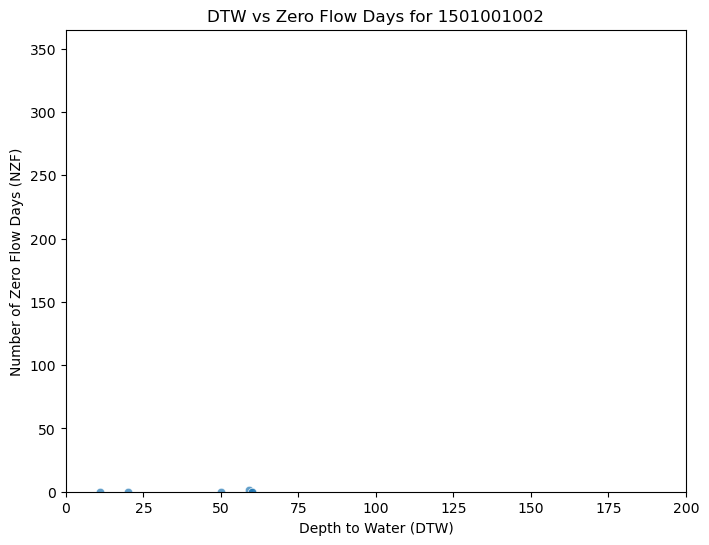

1502000201:
Pearson Correlation Coefficient
  rsq = 0.179
  pval = 0.3444
Spearman Correlation Coefficient
  rsq = 0.028
  pval = 0.7183
Kendall Correlation Coefficient
  rsq = 0.025
  pval = 0.6344


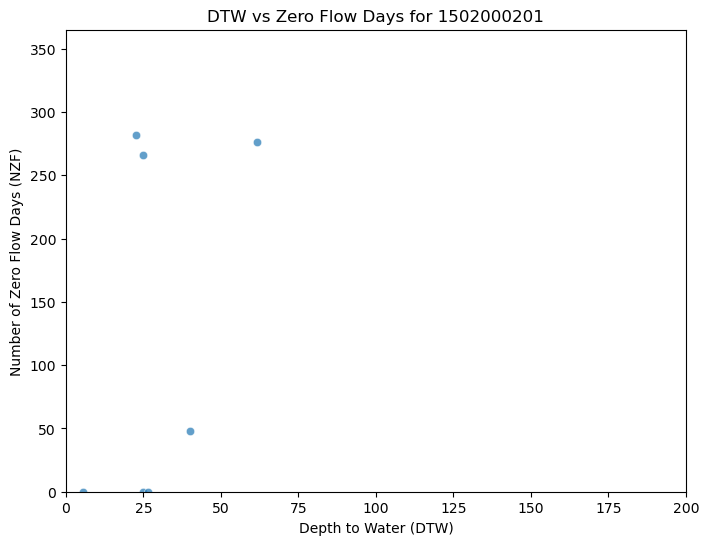

1502000802:
Pearson Correlation Coefficient
  rsq = 0.659
  pval = 0.3967
Spearman Correlation Coefficient
  rsq = 0.75
  pval = 0.3333
Kendall Correlation Coefficient
  rsq = 0.667
  pval = 0.2207


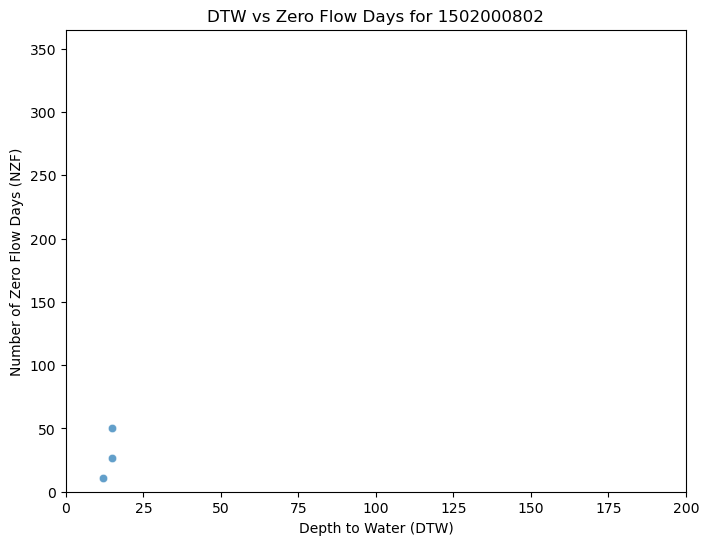

1502000806:
Pearson Correlation Coefficient
  rsq = nan
  pval = nan
Spearman Correlation Coefficient
  rsq = nan
  pval = nan
Kendall Correlation Coefficient
  rsq = nan
  pval = nan


/Users/danielletadych/opt/miniconda3/envs/Drought_Southwest/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/danielletadych/opt/miniconda3/envs/Drought_Southwest/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/danielletadych/Documents/PhD_Materials/github_repos/Shallow_Groundwater_AZ/Code/Utils/CustomFunctions.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return pearsonr(x,y)[1]
/Users/danielletadych/opt/miniconda3/envs/Drought_Southwest/lib/python3.12/site-packages/pandas/core/nanops.py:1632: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return spearmanr(a, b)[0]
/Users/danielletadych/Documents/PhD_Materials/github_repos/Shallow_Groundwater_AZ/Code/Utils/CustomFunctions.py:22: Con

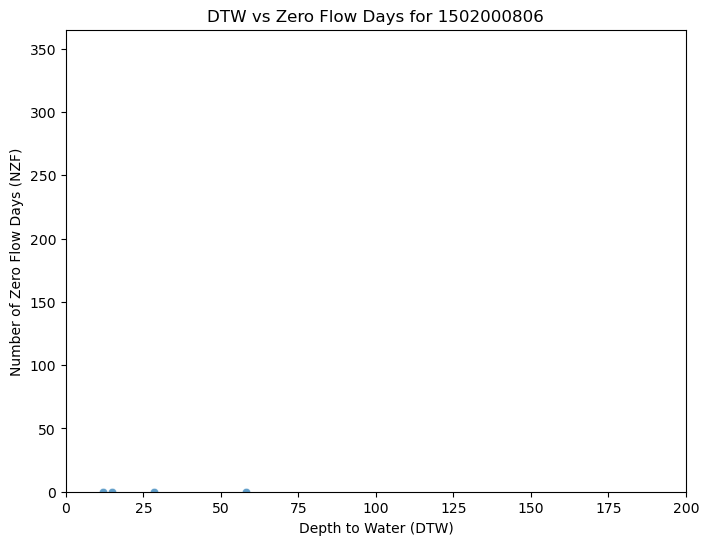

Skipping HUC 1502001001 due to insufficient data points (1)
1503010403:
Pearson Correlation Coefficient
  rsq = 0.959
  pval = 0.1304
Spearman Correlation Coefficient
  rsq = 1.0
  pval = 0.0
Kendall Correlation Coefficient
  rsq = 1.0
  pval = 0.3333


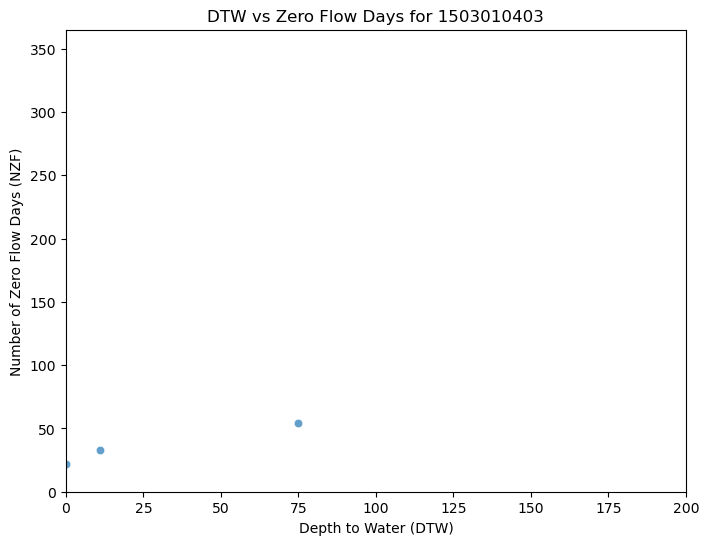

1504000509:
Pearson Correlation Coefficient
  rsq = 0.017
  pval = 0.7578
Spearman Correlation Coefficient
  rsq = 0.014
  pval = 0.7776
Kendall Correlation Coefficient
  rsq = 0.012
  pval = 0.7084


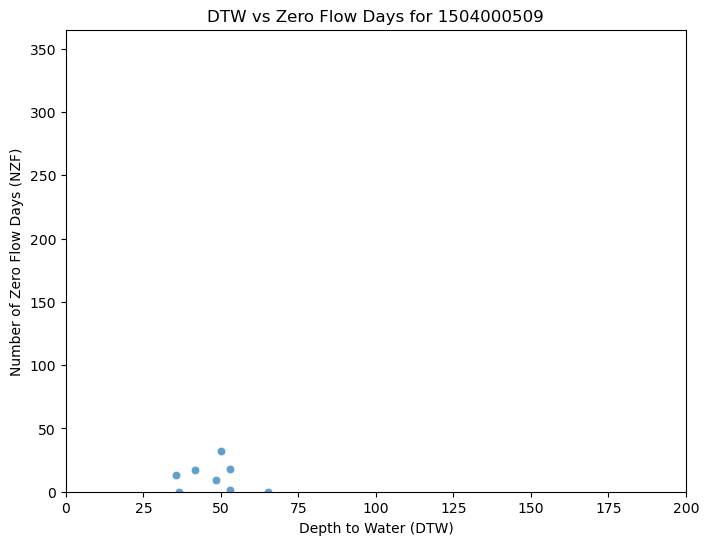

Skipping HUC 1504000608 due to insufficient data points (0)
1505010001:
Pearson Correlation Coefficient
  rsq = 0.627
  pval = 0.208
Spearman Correlation Coefficient
  rsq = 0.6
  pval = 0.2254
Kendall Correlation Coefficient
  rsq = 0.5
  pval = 0.1797


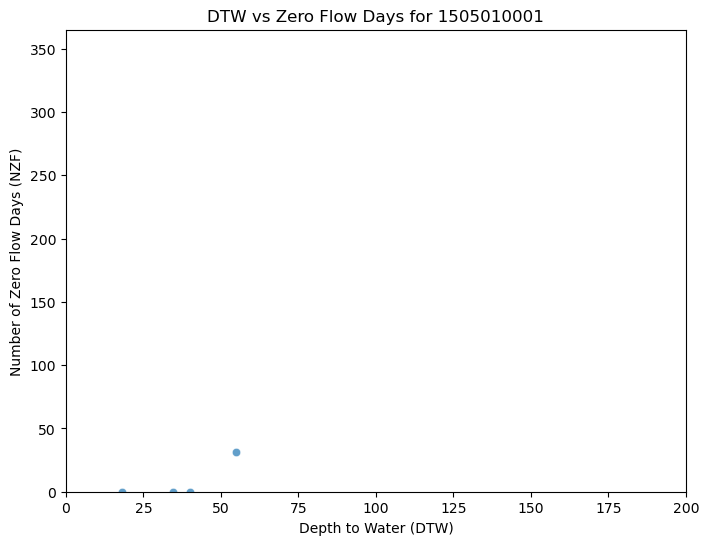

1505010002:
Pearson Correlation Coefficient
  rsq = 0.124
  pval = 0.4395
Spearman Correlation Coefficient
  rsq = 0.166
  pval = 0.3639
Kendall Correlation Coefficient
  rsq = 0.042
  pval = 0.5305


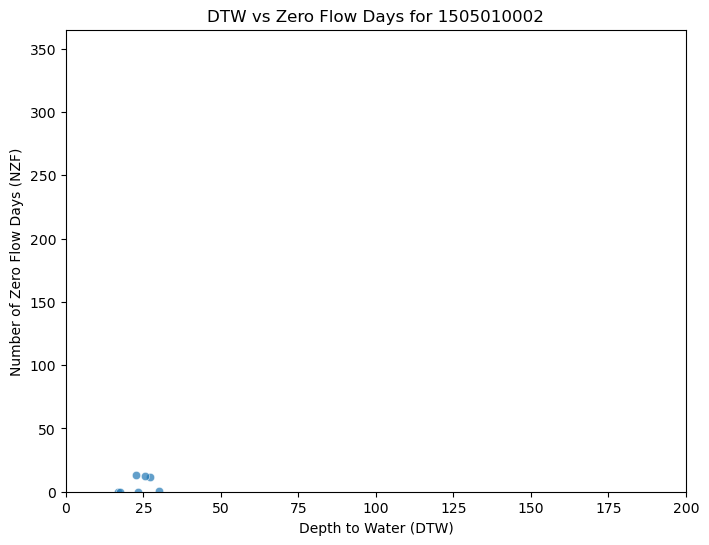

Skipping HUC 1505010007 due to insufficient data points (2)
1505020205:
Pearson Correlation Coefficient
  rsq = 0.033
  pval = 0.8195
Spearman Correlation Coefficient
  rsq = 0.04
  pval = 0.8
Kendall Correlation Coefficient
  rsq = 0.0
  pval = 1.0


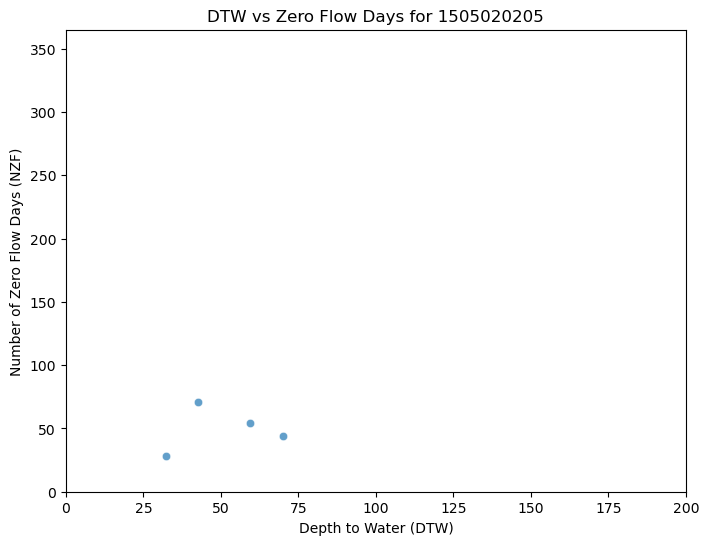

1505030109:
Pearson Correlation Coefficient
  rsq = 0.005
  pval = 0.8655
Spearman Correlation Coefficient
  rsq = 0.354
  pval = 0.1195
Kendall Correlation Coefficient
  rsq = 0.128
  pval = 0.2751


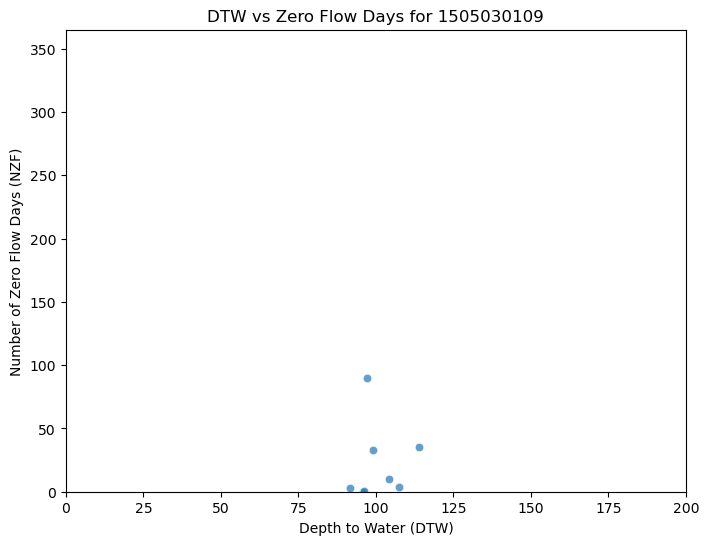

1505030404:
Pearson Correlation Coefficient
  rsq = 0.003
  pval = 0.9331
Spearman Correlation Coefficient
  rsq = 0.09
  pval = 0.6238
Kendall Correlation Coefficient
  rsq = 0.04
  pval = 0.8167


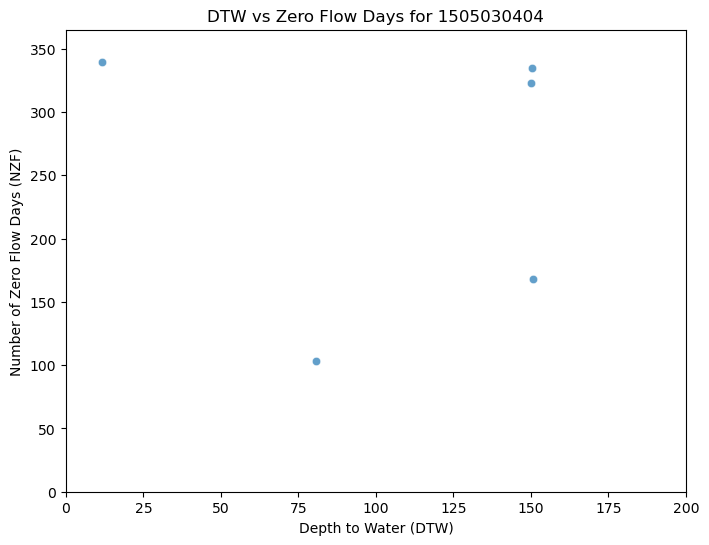

1506010503:
Pearson Correlation Coefficient
  rsq = 0.195
  pval = 0.2734
Spearman Correlation Coefficient
  rsq = 0.327
  pval = 0.139
Kendall Correlation Coefficient
  rsq = 0.128
  pval = 0.2751


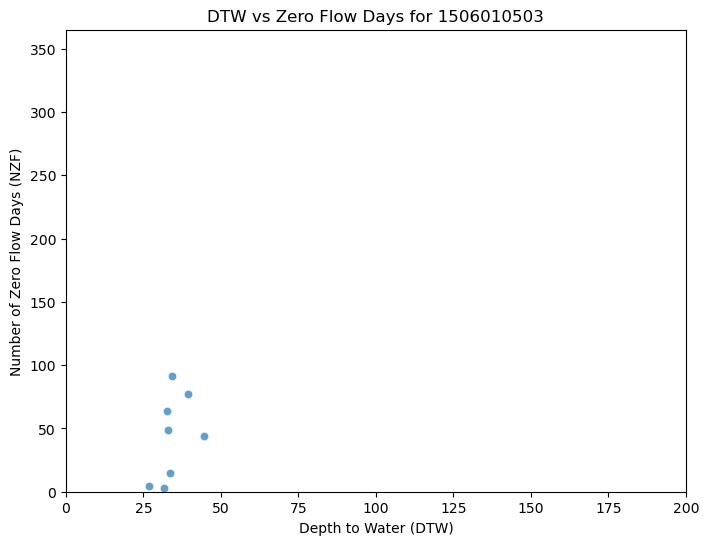

1506020201:
Pearson Correlation Coefficient
  rsq = nan
  pval = nan
Spearman Correlation Coefficient
  rsq = nan
  pval = nan
Kendall Correlation Coefficient
  rsq = nan
  pval = nan


/Users/danielletadych/opt/miniconda3/envs/Drought_Southwest/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/danielletadych/opt/miniconda3/envs/Drought_Southwest/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/danielletadych/Documents/PhD_Materials/github_repos/Shallow_Groundwater_AZ/Code/Utils/CustomFunctions.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return pearsonr(x,y)[1]
/Users/danielletadych/opt/miniconda3/envs/Drought_Southwest/lib/python3.12/site-packages/pandas/core/nanops.py:1632: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return spearmanr(a, b)[0]
/Users/danielletadych/Documents/PhD_Materials/github_repos/Shallow_Groundwater_AZ/Code/Utils/CustomFunctions.py:22: Con

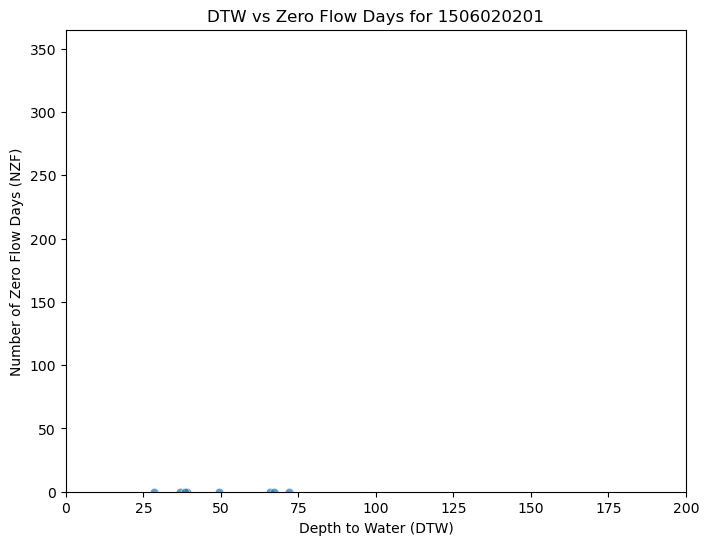

Skipping HUC 1506020304 due to insufficient data points (1)
1507010206:
Pearson Correlation Coefficient
  rsq = 0.263
  pval = 0.6571
Spearman Correlation Coefficient
  rsq = 0.25
  pval = 0.6667
Kendall Correlation Coefficient
  rsq = 0.111
  pval = 1.0


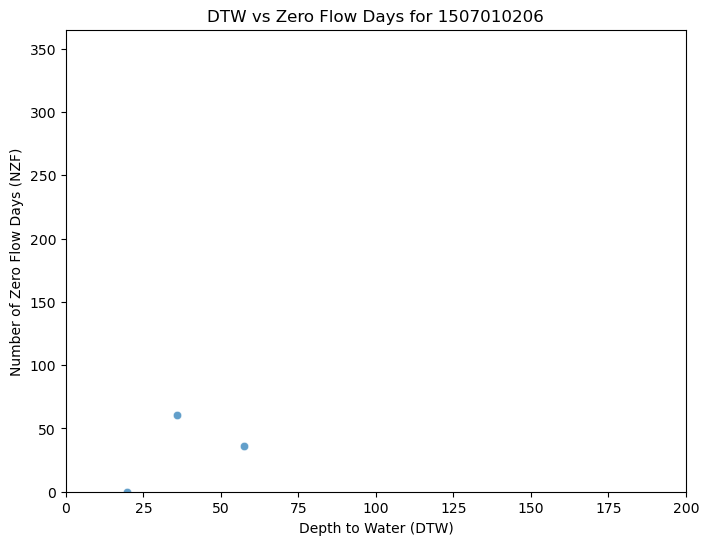

1507010303:
Pearson Correlation Coefficient
  rsq = 0.323
  pval = 0.2395
Spearman Correlation Coefficient
  rsq = 0.295
  pval = 0.2657
Kendall Correlation Coefficient
  rsq = 0.218
  pval = 0.2722


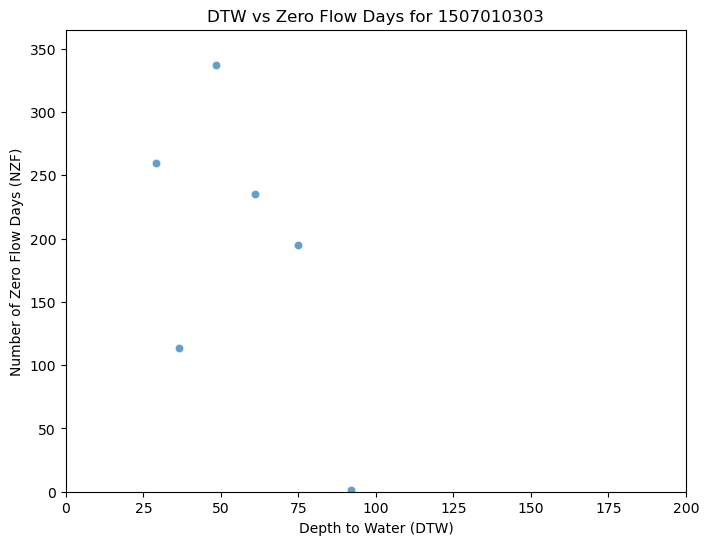

1507010305:
Pearson Correlation Coefficient
  rsq = 0.062
  pval = 0.5913
Spearman Correlation Coefficient
  rsq = 0.25
  pval = 0.2532
Kendall Correlation Coefficient
  rsq = 0.184
  pval = 0.2389


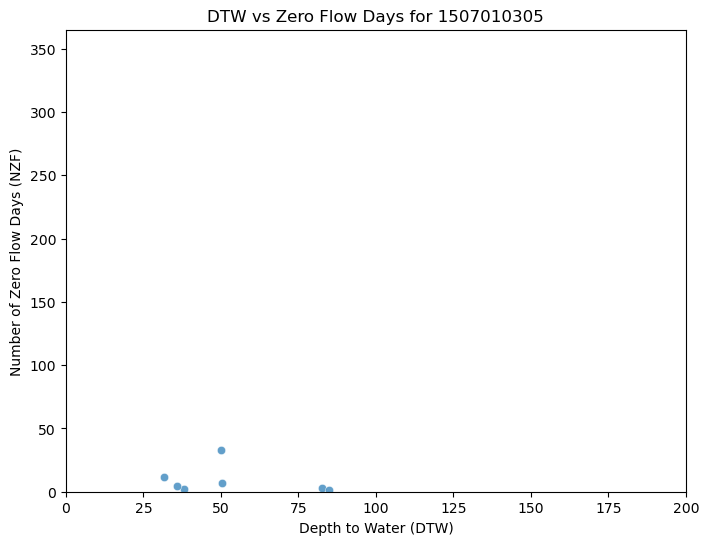

In [93]:
for i in common_hucs.to_list():
    huc_df = df_final[df_final['index'] == i]
    
    # Skip HUCs with fewer than 2 data points
    if len(huc_df) < 3:
        print(f"Skipping HUC {i} due to insufficient data points ({len(huc_df)})")
        continue

    df1 = huc_df['DTW']
    df2 = huc_df['NZF']

    print(str(i) + ":")
    print('Pearson Correlation Coefficient')
    r = df1.corr(df2, method='pearson')
    print('  rsq = ' + str(round(r * r, 3)))
    print('  pval = ' + str(round(df1.corr(df2, method=cf.pearsonr_pval), 4)))

    print('Spearman Correlation Coefficient')
    r = df1.corr(df2, method='spearman')
    print('  rsq = ' + str(round(r * r, 3)))
    print('  pval = ' + str(round(df1.corr(df2, method=cf.spearmanr_pval), 4)))

    print('Kendall Correlation Coefficient')
    r = df1.corr(df2, method='kendall')
    print('  rsq = ' + str(round(r * r, 3)))
    print('  pval = ' + str(round(df1.corr(df2, method=cf.kendall_pval), 4)))

    # Scatterplot
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=huc_df, x="DTW", y="NZF", alpha=0.7)
    plt.xlabel("Depth to Water (DTW)")
    plt.ylabel("Number of Zero Flow Days (NZF)")
    plt.title("DTW vs Zero Flow Days for "+str(i))
    plt.xlim(0,200)
    plt.ylim(0,365)
    plt.show()
